# Outlier

- https://en.wikipedia.org/wiki/Median_absolute_deviation
- https://pdfs.semanticscholar.org/8d26/824e26b489548f58156efdfb72d8c9f7596f.pdf
- https://www.youtube.com/watch?v=i980pdv1sRU

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
mu = 0.0
sigma = 1.0
size = 1000
data = np.random.normal(mu, sigma, size)

In [3]:
df = pd.DataFrame(data, columns = ['v']) 

In [4]:
df.sort_values(by=['v'], ascending=False).head(5)

,v
964,2.851527
251,2.836482
980,2.833718
970,2.781313
261,2.634442


In [5]:
# outlier
df.iloc[0] = 4.0

In [6]:
df.sort_values(by=['v'], ascending=False).head(5)

,v
0,4.000000
964,2.851527
251,2.836482
980,2.833718
970,2.781313


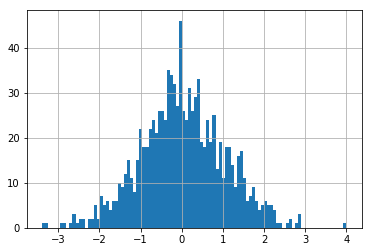

In [7]:
df['v'].hist(bins=100)

In [8]:
df['z score'] = ( df['v'] - df['v'].mean() ) / df['v'].std()

In [9]:
sample_median = df['v'].sample(frac=0.5).median()
mad = ( df['v'] - sample_median ).abs().median()
df['modified z score'] = 0.6745 * ( df['v'] - sample_median ) / mad
# this constant 0.6745 is needed because E(MAD) = 0.6745σ for large n.
# https://en.wikipedia.org/wiki/Median_absolute_deviation#Relation_to_standard_deviation

In [10]:
df.sort_values(by=['modified z score'], ascending=False).head(10)

,v,z score,modified z score
0,4.000000,3.883294,4.109088
964,2.851527,2.759922,2.931657
251,2.836482,2.745205,2.916233
980,2.833718,2.742502,2.913399
970,2.781313,2.691243,2.859673
261,2.634442,2.547581,2.709098
996,2.605927,2.519689,2.679864
97,2.524146,2.439696,2.596021
817,2.379654,2.298362,2.447886
292,2.356814,2.276021,2.424470


In [11]:
D = 3.5
df['outlier'] = df['modified z score'].abs() > D

In [12]:
df[df['outlier'] == True]

,v,z score,modified z score,outlier
0,4.0,3.883294,4.109088,True


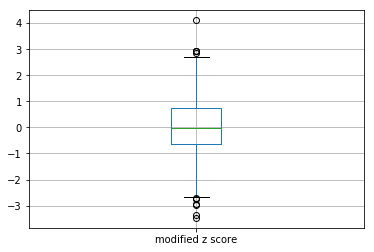

In [21]:
df.boxplot(column='modified z score', whis=1.5)

In [14]:
# TBD